In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns
import scipy

In [3]:
dataset=pd.read_csv("heart.csv")

In [4]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data=dataset.drop(['age','trtbps','chol','thalachh','oldpeak'],axis=1)

In [6]:
for i in data:
    print(i)
    
    print(dataset[i].value_counts())
    print("------------"*5)

sex
1    207
0     96
Name: sex, dtype: int64
------------------------------------------------------------
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
------------------------------------------------------------
fbs
0    258
1     45
Name: fbs, dtype: int64
------------------------------------------------------------
restecg
1    152
0    147
2      4
Name: restecg, dtype: int64
------------------------------------------------------------
exng
0    204
1     99
Name: exng, dtype: int64
------------------------------------------------------------
slp
2    142
1    140
0     21
Name: slp, dtype: int64
------------------------------------------------------------
caa
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
------------------------------------------------------------
thall
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
------------------------------------------------------------
output
1    165
0    138
Name: output, dtype: int64

In [7]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Correlation

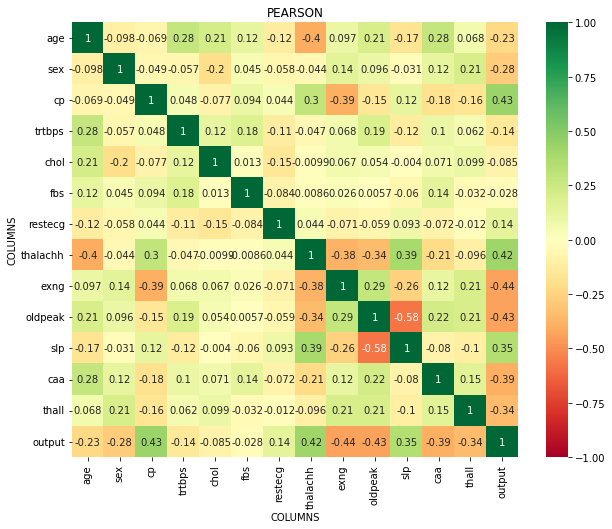

In [9]:
corrPearson = dataset.corr(method="pearson")
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

# Missing values

In [12]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f99cb82be90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99cb85fed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f99cb862f10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f99cb8629d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f99cb85f450>,
  <matplotlib.lines.Line2D at 0x7f99ca5fb9d0>]}

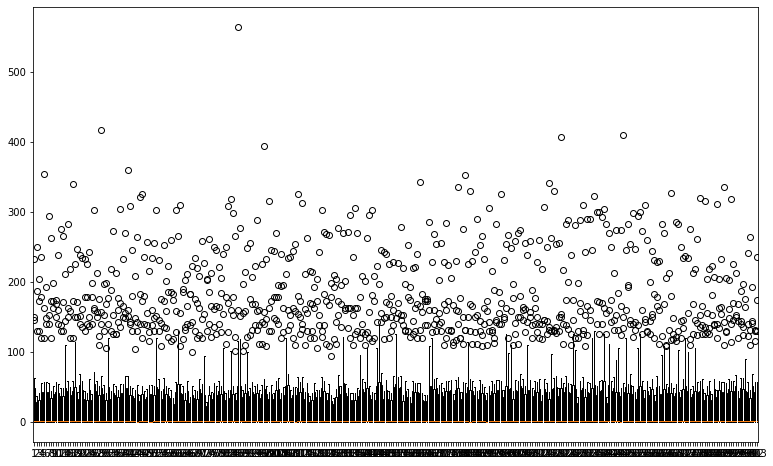

In [13]:
figure = plt.figure(figsize=(13,8))

plt.boxplot(dataset)

In [15]:
for i in dataset:
    if (i=='trtbps' or i=='chol' or i=='thalachh' or i=='oldpeak'):
        print(i)
        q1=dataset[i].quantile(0.25)
        q3=dataset[i].quantile(0.75)
        iqr=q3-q1
        low=q1-(0.5*iqr)
        high=q3+(0.5*iqr)
        dataset[i][dataset[i]<low]=dataset[i].median()
        dataset[i][dataset[i]>high]=dataset[i].median()
        

trtbps
chol
thalachh
oldpeak


{'boxes': [<matplotlib.lines.Line2D at 0x7f99c9f33f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99c9df2050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f99c9df7090>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f99c9df2b10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f99c9df0590>,
  <matplotlib.lines.Line2D at 0x7f99c8812390>]}

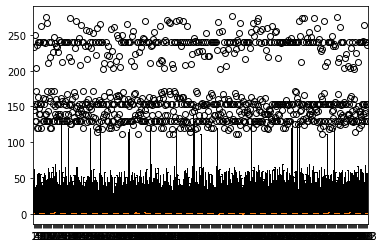

In [16]:
plt.boxplot(dataset)

# vizualisations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99c851ef90>,
      dtype=object)

<Figure size 720x576 with 0 Axes>

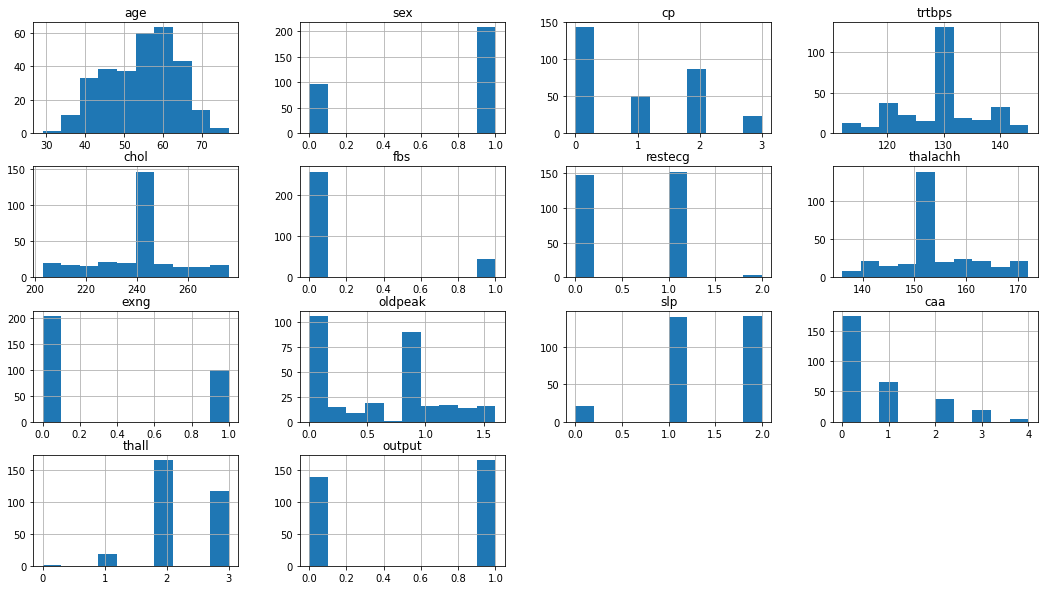

In [17]:
figure=plt.figure(figsize=(10,8))
dataset.hist(figsize=(18,10))

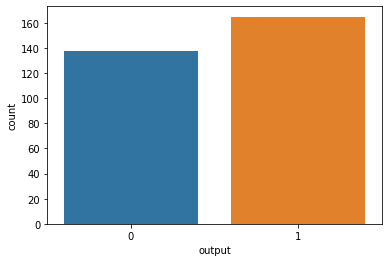

In [18]:
sns.countplot('output',data=dataset)

* By obseving the above vizualisation, we decide that the data should be balanced. 

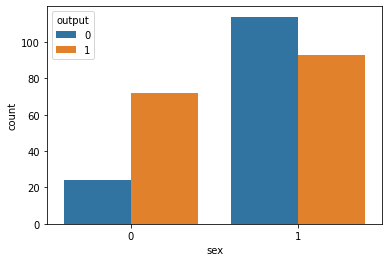

In [19]:
sns.countplot(x='sex',hue='output',data=dataset)

* By above Visualisation, we decide that mostly males are getting Heart Attack than Females.

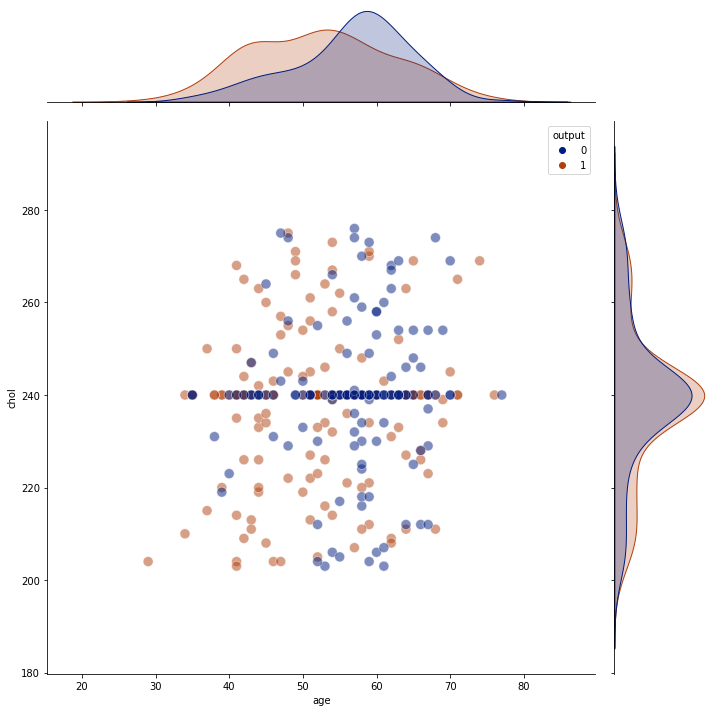

In [20]:
sns.jointplot(data = dataset, x = 'age', y = 'chol', hue = 'output', palette='dark', height = 10, s = 100, alpha = 0.5)

* the above visualisation represents between age and chol with output.
Mostly the age between 40-60 and chol between 200-270 persons are getting heart attack.

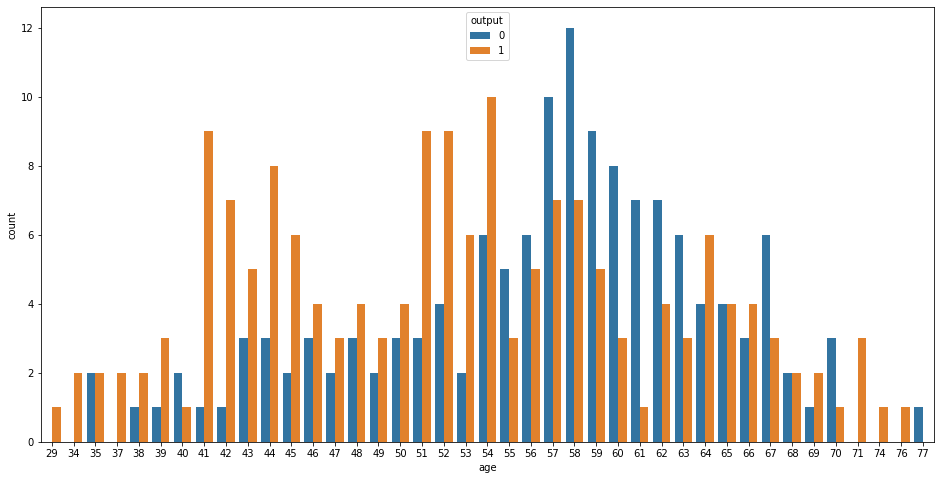

In [21]:
figure=plt.figure(figsize=(16,8))
sns.countplot(x='age',hue='output',data=dataset)

* Mostly the persons are having the age between (41-54) getting the heart attack. 

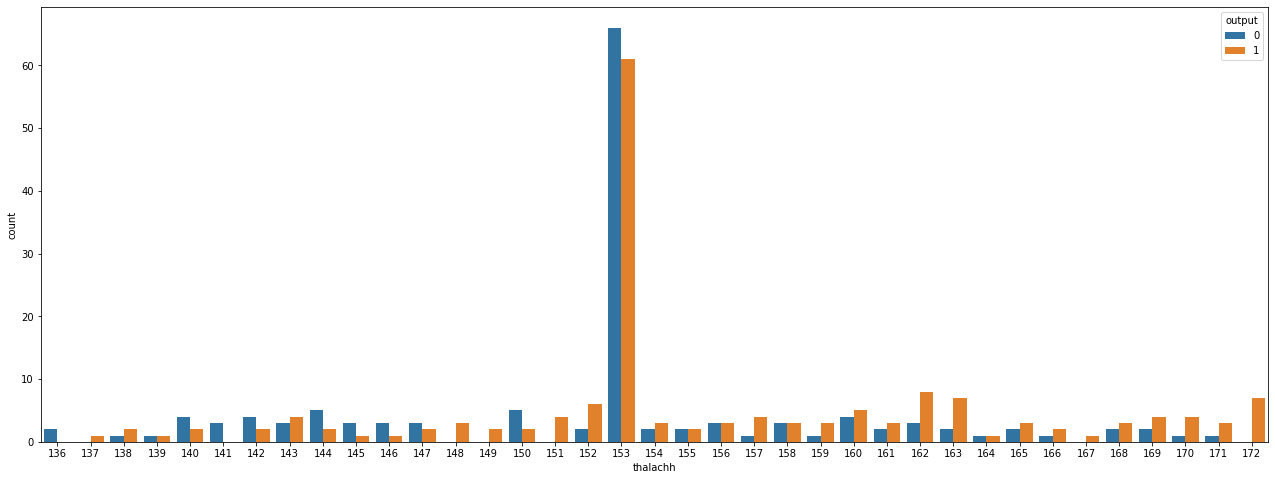

In [22]:
figure=plt.figure(figsize=(22,8))
sns.countplot(x='thalachh',hue='output',data=dataset)

In [23]:
dataset.groupby(['sex','output'])['chol'].mean()

sex  output
0    0         241.291667
     1         239.541667
1    0         239.736842
     1         236.139785
Name: chol, dtype: float64

In [24]:
dataset.groupby(['sex','output'])['thalachh'].mean()

sex  output
0    0         152.000000
     1         157.402778
1    0         152.561404
     1         154.763441
Name: thalachh, dtype: float64

In [25]:
dataset.groupby(['sex','output'])['age'].mean()

sex  output
0    0         59.041667
     1         54.555556
1    0         56.087719
     1         50.903226
Name: age, dtype: float64

# Skewness

In [26]:
for i in dataset:
    print(i,' : ',scipy.stats.skew(dataset[i], axis=0, bias=True))
    

age  :  -0.2014596901125439
sex  :  -0.7874122909518428
cp  :  0.4823293961332623
trtbps  :  -0.19563932069289067
chol  :  -0.09341696075633643
fbs  :  1.976803464683451
restecg  :  0.1617165704075642
thalachh  :  0.25094403181180297
exng  :  0.7388505791113107
oldpeak  :  0.2860064649237208
slp  :  -0.5057957274757736
caa  :  1.303925955673585
thall  :  -0.47435893118696904
output  :  -0.17892962380969754


In [27]:
y=dataset['output']
x=dataset.drop(['output','sex','fbs','exng'],axis=1)

In [28]:
x.head()

,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall
0,63,3,145,233,0,150,0.8,0,0,1
1,37,2,130,250,1,153,0.8,0,0,2
2,41,1,130,204,0,172,1.4,2,0,2
3,56,1,120,236,1,153,0.8,2,0,2
4,57,0,120,240,1,163,0.6,2,0,2


# Transformations

In [29]:
x.head()

,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall
0,63,3,145,233,0,150,0.8,0,0,1
1,37,2,130,250,1,153,0.8,0,0,2
2,41,1,130,204,0,172,1.4,2,0,2
3,56,1,120,236,1,153,0.8,2,0,2
4,57,0,120,240,1,163,0.6,2,0,2


# scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)

In [31]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.708333,1.000000,1.000000,0.410959,0.0,0.388889,0.500,0.0,0.0,0.333333
1,0.166667,0.666667,0.545455,0.643836,0.5,0.472222,0.500,0.0,0.0,0.666667
2,0.250000,0.333333,0.545455,0.013699,0.0,1.000000,0.875,1.0,0.0,0.666667
3,0.562500,0.333333,0.242424,0.452055,0.5,0.472222,0.500,1.0,0.0,0.666667
4,0.583333,0.000000,0.242424,0.506849,0.5,0.750000,0.375,1.0,0.0,0.666667


# splitting

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,GridSearchCV,StratifiedKFold
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

# modeling

In [33]:
from sklearn.tree import DecisionTreeClassifier   #importing model
from sklearn.neighbors import KNeighborsClassifier #import method
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,classification_report, plot_confusion_matrix


# XGBoost

In [34]:
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pre=classifier.predict(x_train)
y_pred=classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))


validation confusion matrix
[[17 10]
 [ 7 27]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.7357142857142855
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.73      0.79      0.76        34

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       111
           1       0.99      0.98      0.98   

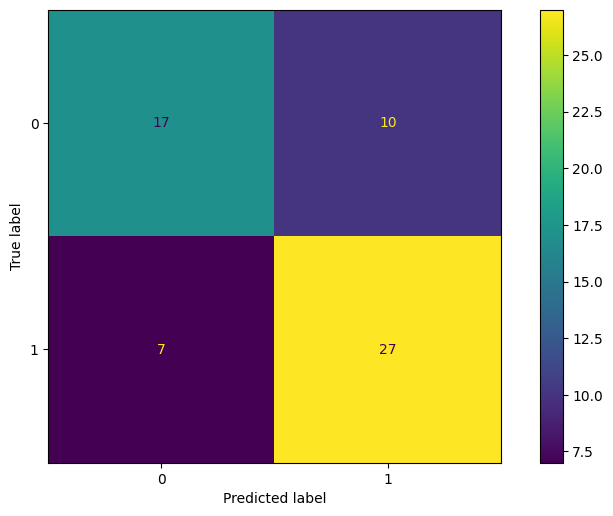

In [35]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# Decision Tree

In [36]:

classifier = DecisionTreeClassifier(criterion = 'entropy') #creating algorithm
classifier.fit(x_train, y_train) #applying on model
y_pred = classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))



validation confusion matrix
[[17 10]
 [ 8 26]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.7880952380952382
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        27
           1       0.72      0.76      0.74        34

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00   

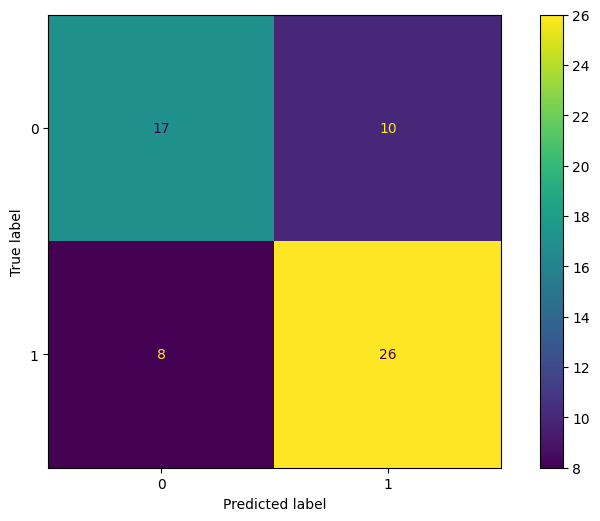

In [37]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# KNN

In [38]:
classifier=KNeighborsClassifier(n_neighbors=50)     #create algorithm 
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test) #predicting model
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))


validation confusion matrix
[[14 13]
 [ 7 27]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.5571428571428572
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.67      0.52      0.58        27
           1       0.68      0.79      0.73        34

    accuracy                           0.67        61
   macro avg       0.67      0.66      0.66        61
weighted avg       0.67      0.67      0.66        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       111
           1       0.78      0.85      0.81   

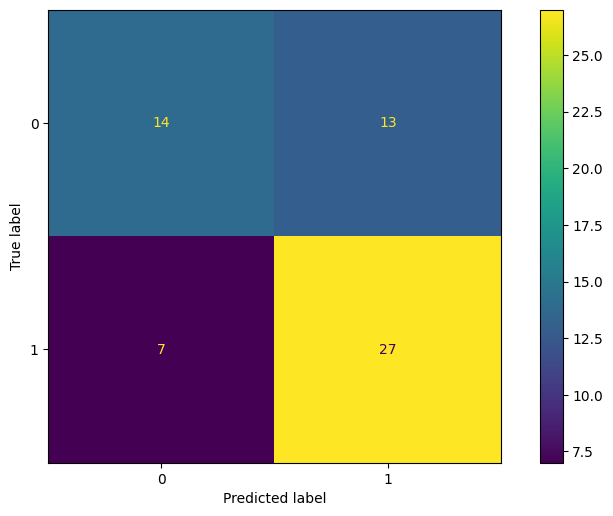

In [39]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# Logistic regression

In [40]:
classifier=LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))


validation confusion matrix
[[16 11]
 [ 6 28]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.6880952380952381
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.72      0.82      0.77        34

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.82      0.89      0.85   

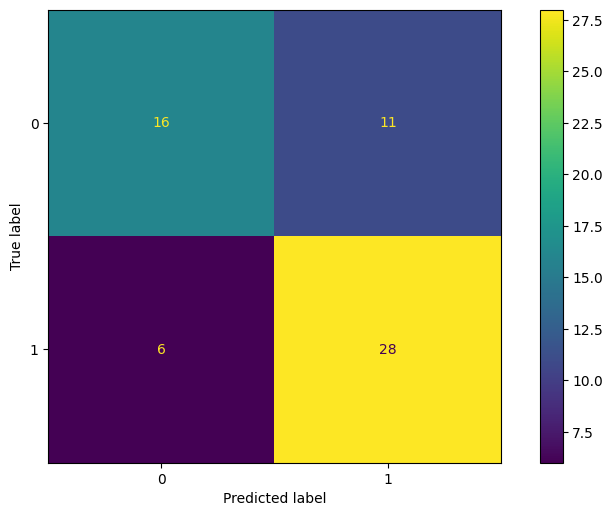

In [41]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# Navie Bayes

In [42]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))

validation confusion matrix
[[18  9]
 [10 24]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.6738095238095237
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        27
           1       0.73      0.71      0.72        34

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       111
           1       0.84      0.85      0.85   

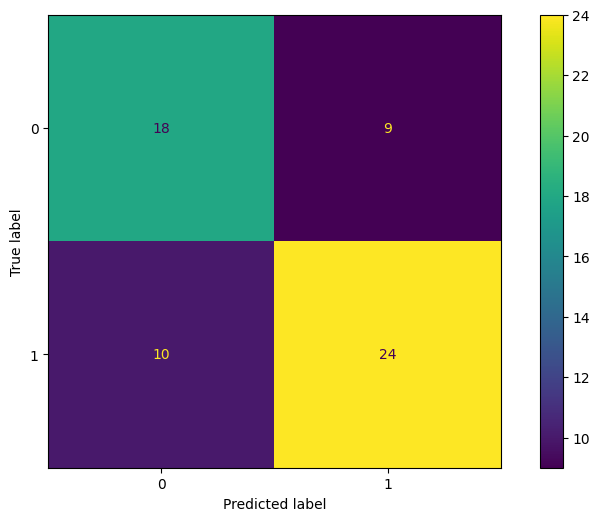

In [43]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# Random Forest

In [44]:
classifier=RandomForestClassifier(n_estimators=1500,criterion='entropy')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,verbose=False).mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))



validation confusion matrix
[[17 10]
 [ 7 27]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.7857142857142856
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        27
           1       0.73      0.79      0.76        34

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00   

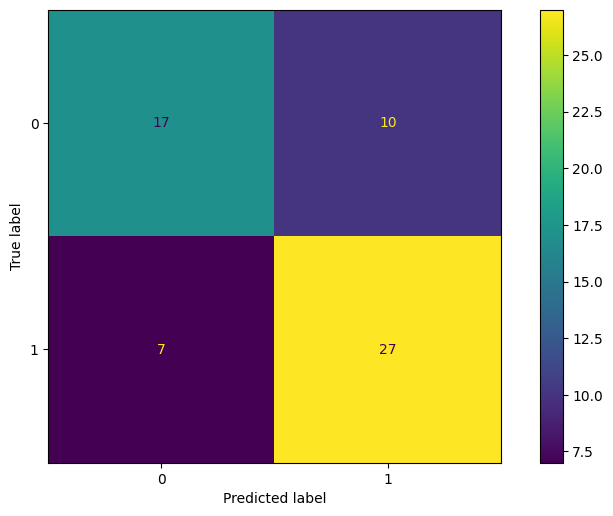

In [45]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);

# SVM

In [46]:
classifier=SVC(kernel='poly')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pre = classifier.predict(x_train)
print("validation confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("---------------"*8)
print("cross validation score")
print(cross_val_score(classifier,x_test,y_test,cv=10,scoring='accuracy').mean())
print("---------------"*8)
print("Validation Classification report ")
print(classification_report(y_test, y_pred))
print("---------------"*8)
print("Training Classification report ")
print(classification_report(y_train, y_pre))


validation confusion matrix
[[15 12]
 [10 24]]
------------------------------------------------------------------------------------------------------------------------
cross validation score
0.6690476190476191
------------------------------------------------------------------------------------------------------------------------
Validation Classification report 
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        27
           1       0.67      0.71      0.69        34

    accuracy                           0.64        61
   macro avg       0.63      0.63      0.63        61
weighted avg       0.64      0.64      0.64        61

------------------------------------------------------------------------------------------------------------------------
Training Classification report 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       111
           1       0.89      0.95      0.92   

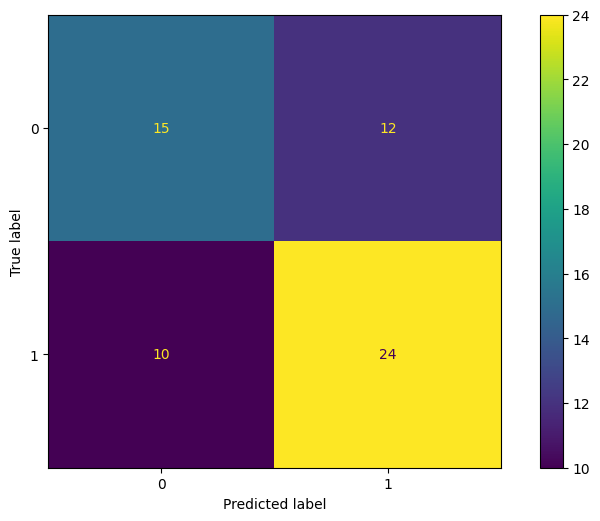

In [47]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
plot_confusion_matrix(classifier, x_test, y_test, ax = ax);